In [1]:
import pandas as pd


if __name__ == '__main__':

	df_aaup    = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/aaup.data', header=None)
	df_usnews  = pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/usnews.data', header=None)

aaup = df_aaup.rename(columns={
    0: 'FICE',
    1: 'College name',
    2: 'State',
    3: 'Type',
    4: 'Avg salary - full prof',
    5: 'Avg salary - assoc prof',
    6: 'Avg salary - asst prof',
    7: 'Avg salary - all ranks',
    8: 'Avg compensation - full prof',
    9: 'Avg compensation - assoc prof',
    10: 'Avg compensation - asst prof',
    11: 'Avg compensation - all ranks',
    12: 'No. of full prof',
    13: 'No. of assoc prof',
    14: 'No. of asst prof',
    15: 'No. of instructors',
    16: 'No. of faculty - all ranks'
})

new_names = ['fice', 'college_name', 'state', 'public_private', 'math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']

usnews = df_usnews.rename(columns=dict(enumerate(new_names)))

cols=['math_sat_avg', 'verbal_sat_avg',
             'combined_sat_avg', 'act_avg', 'math_sat_1st_quart', 'math_sat_3rd_quart',
             'verbal_sat_1st_quart', 'verbal_sat_3rd_quart', 'act_1st_quart', 'act_3rd_quart',
             'num_applications_received', 'num_applicants_accepted', 'num_new_students_enrolled',
             'pct_new_students_top_10', 'pct_new_students_top_25', 'num_fulltime_undergrads',
             'num_parttime_undergrads', 'instate_tuition', 'outstate_tuition', 'room_board_cost',
             'room_cost', 'board_cost', 'additional_fees', 'estimated_book_costs',
             'estimated_personal_spending', 'pct_faculty_phd', 'pct_faculty_terminal_degree',
             'student_faculty_ratio', 'pct_alumni_donate', 'instructional_expense_per_student',
             'graduation_rate']
usnews[cols] = usnews[cols].apply(pd.to_numeric, errors='coerce', axis=1)
usnews['TotalExp']=usnews['instate_tuition']+usnews['room_board_cost']+usnews['room_cost']+ usnews['board_cost']+ usnews['additional_fees']+ usnews['estimated_book_costs']+usnews['estimated_personal_spending']


# usnews.to_csv('usnewsread.csv', index=False)
# aaup.to_csv('aaupread.csv', index=False)
print(usnews)


       fice                       college_name state  public_private  \
0      1061          Alaska Pacific University    AK               2   
1      1063  University of Alaska at Fairbanks    AK               1   
2      1065     University of Alaska Southeast    AK               1   
3     11462  University of Alaska at Anchorage    AK               1   
4      1002        Alabama Agri. & Mech. Univ.    AL               1   
...     ...                                ...   ...             ...   
1297   3826        West Virginia State College    WV               1   
1298   3827           West Virginia University    WV               1   
1299   3830     West Virginia Wesleyan College    WV               2   
1300   3831            Wheeling Jesuit College    WV               2   
1301   3932              University of Wyoming    WY               1   

      math_sat_avg  verbal_sat_avg  combined_sat_avg  act_avg  \
0            490.0           482.0             972.0     20.0   
1    

In [2]:
for column in usnews.columns:
  if usnews[column].dtypes=='float64':
    median=usnews[column].median()
    usnews[column].fillna(median,inplace=True)
print(usnews)




       fice                       college_name state  public_private  \
0      1061          Alaska Pacific University    AK               2   
1      1063  University of Alaska at Fairbanks    AK               1   
2      1065     University of Alaska Southeast    AK               1   
3     11462  University of Alaska at Anchorage    AK               1   
4      1002        Alabama Agri. & Mech. Univ.    AL               1   
...     ...                                ...   ...             ...   
1297   3826        West Virginia State College    WV               1   
1298   3827           West Virginia University    WV               1   
1299   3830     West Virginia Wesleyan College    WV               2   
1300   3831            Wheeling Jesuit College    WV               2   
1301   3932              University of Wyoming    WY               1   

      math_sat_avg  verbal_sat_avg  combined_sat_avg  act_avg  \
0            490.0           482.0             972.0     20.0   
1    

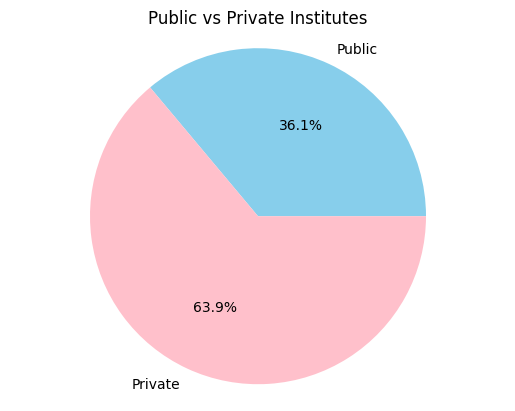

In [3]:
import matplotlib.pyplot as plt

public_count = len(usnews[usnews['public_private'] == 1])
private_count = len(usnews[usnews['public_private'] == 2])

# Create a pie chart of the public and private institute counts
labels = ['Public', 'Private']
sizes = [public_count, private_count]
colors = ['skyblue', 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Public vs Private Institutes')
plt.axis('equal')
plt.show()

Institute Type
Private    1820154.0
Public     4370697.0
Name: undergrads, dtype: float64


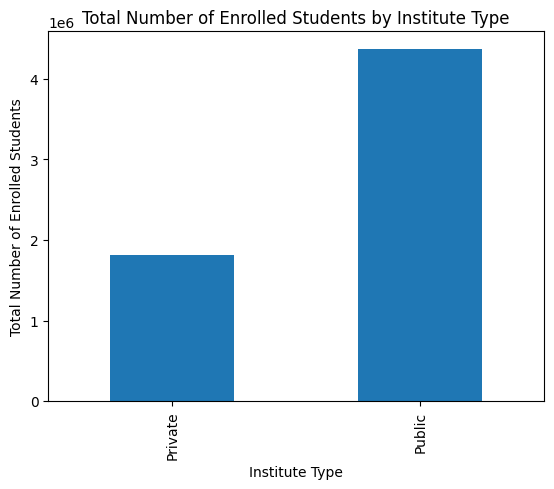

In [7]:
usnews['Institute Type'] = usnews['public_private'].map({1: 'Public', 2: 'Private'})
usnews['undergrads']=usnews['num_fulltime_undergrads']+usnews['num_parttime_undergrads']
enrollment_data = usnews.groupby('Institute Type')['undergrads'].sum()

print(enrollment_data)

enrollment_data.plot(kind='bar')
plt.title('Total Number of Enrolled Students by Institute Type')
plt.xlabel('Institute Type')
plt.ylabel('Total Number of Enrolled Students')
plt.show()

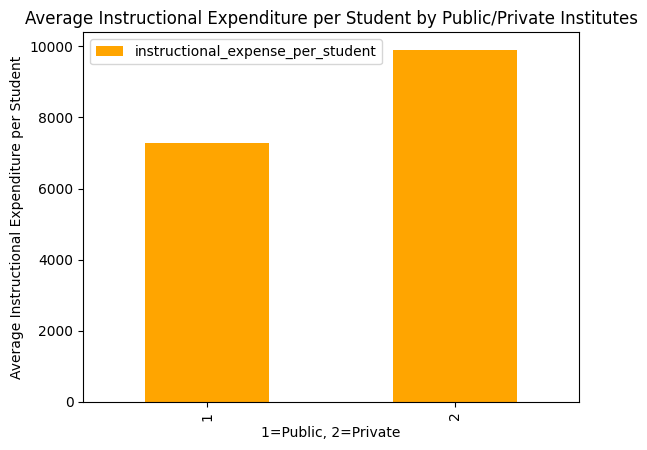

In [15]:
cols = ['public_private', 'instructional_expense_per_student']
df = usnews[cols]

grouped = df.groupby('public_private').mean()

grouped.plot(kind='bar', color='orange')
plt.title('Average Instructional Expenditure per Student by Public/Private Institutes')
plt.xlabel('1=Public, 2=Private')
plt.ylabel('Average Instructional Expenditure per Student')
plt.show()

<ipython-input-20-685c68449261>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['public_private'] = df['public_private'].replace({1: 'Public', 2: 'Private'})


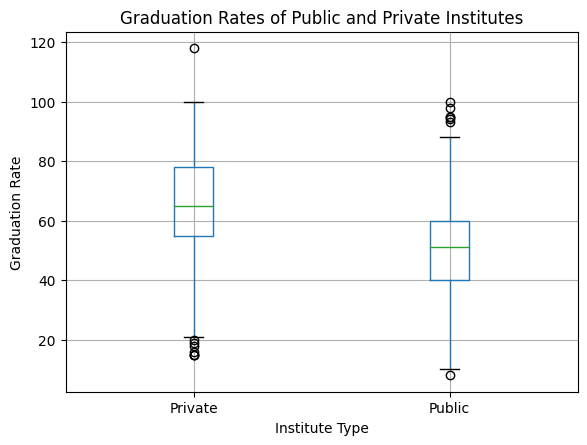

In [20]:
cols = ['public_private', 'graduation_rate']
df = usnews[cols]

df['public_private'] = df['public_private'].replace({1: 'Public', 2: 'Private'})

df.boxplot(by='public_private', column='graduation_rate')
plt.title('Graduation Rates of Public and Private Institutes')
plt.suptitle('')
plt.xlabel('Institute Type')
plt.ylabel('Graduation Rate')
plt.show()